## 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset: 

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# Assumption Check:

## 3. Test for Normality:

### 3.1 Using distplot

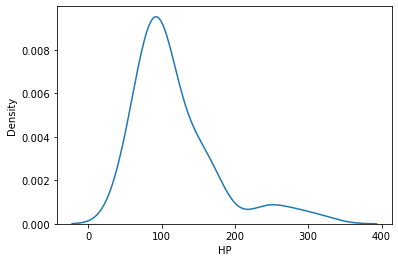

In [3]:
sns.distplot(a = cars_data['HP'], hist = False )
plt.show()

### Observation: 
Left skewed; not normally distributed.

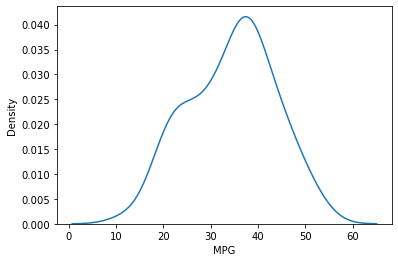

In [4]:
sns.distplot(a = cars_data['MPG'], hist = False )
plt.show()

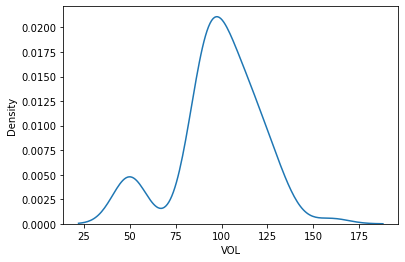

In [10]:
sns.distplot(a = cars_data['VOL'], hist = False )
plt.show()

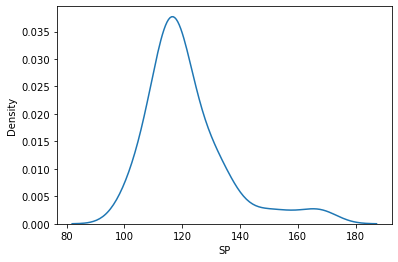

In [5]:
sns.distplot(a = cars_data['SP'], hist = False )
plt.show()

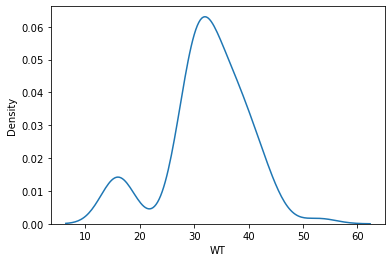

In [12]:
sns.distplot(a = cars_data['WT'], hist = False )
plt.show()

### 3.2 Using Probplot:

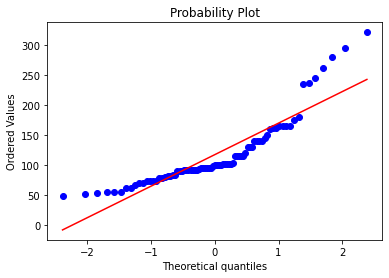

In [6]:
from scipy import stats
stats.probplot(x=cars_data['HP'],  dist = 'norm', plot= plt)
plt.show()

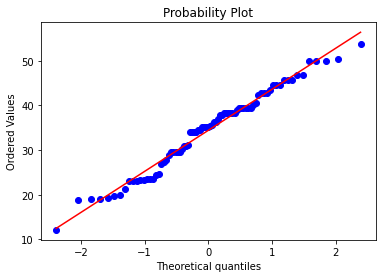

In [7]:
stats.probplot(x=cars_data['MPG'],  dist = 'norm', plot= plt)
plt.show()

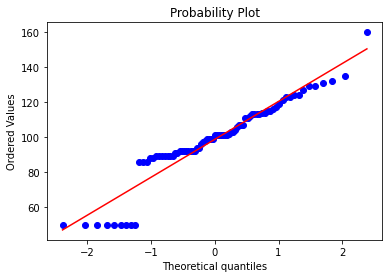

In [8]:
stats.probplot(x=cars_data['VOL'],  dist = 'norm', plot= plt)
plt.show()

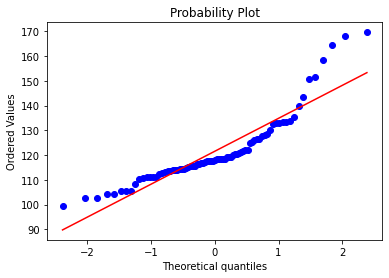

In [9]:
stats.probplot(x = cars_data['SP'], dist = 'norm', plot = plt)
plt.show()

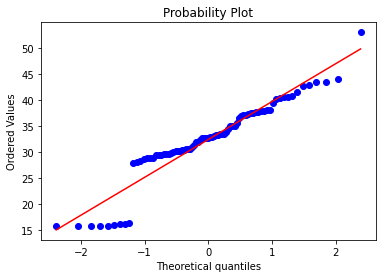

In [10]:
stats.probplot(x = cars_data['WT'], dist='norm', plot=plt)
plt.show()

### Observation:
Test for normality fails.

### 4. Multicollinearity Test:
This test can be done using two methods:
1. Correlation matrix
2. VIF( Variance Inflation Factor)

### 4.1 Using Correlation matrix:

In [12]:
corr_matrix = cars_data.corr().round(2)
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


<AxesSubplot:>

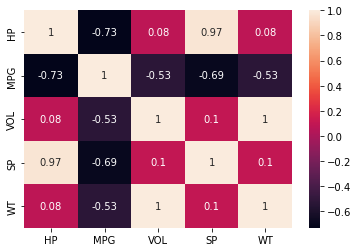

In [14]:
sns.heatmap(data = corr_matrix , annot=True)

### Observation:
Multicollinearity exists. Hence, Multicollinearity test fails.

### 5. No Auto-Regression Test: Passed.
(There is no time datatype, hence output won't be influenced by time)

### Model Building:

In [26]:
X = cars_data.drop(labels = ['MPG'], axis = 1)
y = cars_data[['MPG']] #Dataframe format

In [18]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [27]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [28]:
X.mean()

HP     117.469136
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

In [29]:
X.std()

HP     57.113502
VOL    22.301497
SP     14.181432
WT      7.492813
dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler #StandardScalar is used to make features look std. normally distributed data
                                                 #mean=0, std deviation = 1 #Standardisation
std_scalar = StandardScaler()                    #Creating an object for class (std_scalar is the object)
scaled_X = std_scalar.fit_transform(X)           #Transform features with mean=0 and std deviation =1
scaled_X

array([[-1.20629511, -0.44061061, -1.23140253, -0.49023816],
       [-1.1005866 , -0.30525236, -1.14087145, -0.26129934],
       [-1.1005866 , -0.30525236, -1.14087145, -0.29799301],
       [-0.83631531, -0.30525236, -0.57323872, -0.2391033 ],
       [-1.13582277, -0.30525236, -1.21182554, -0.33887816],
       [-0.83631531, -0.44061061, -0.59281571, -0.37881419],
       [-1.1005866 , -0.30525236, -1.14087145, -0.28256505],
       [-0.97726   , -2.20026792, -1.34399532, -2.22453536],
       [-0.97726   , -2.20026792, -1.34399532, -2.15581433],
       [-0.66013445, -0.21501352, -0.4182792 , -0.20042158],
       [-0.78346105, -0.44061061, -0.73472389, -0.40949027],
       [-0.44871742, -2.20026792, -0.27968395, -2.23718888],
       [-0.44871742,  0.01058357,  0.04007367,  0.05385348],
       [-0.78346105, -0.44061061, -0.73472389, -0.40746314],
       [-0.90678765, -0.44061061, -0.94758617, -0.41164734],
       [-0.78346105, -0.44061061, -0.73472389, -0.37710085],
       [-0.69537062, -0.

In [36]:
scaled_X = pd.DataFrame(data = scaled_X, columns = ['HP', 'VOL', 'SP', 'WT']) #dataframe format
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [37]:
scaled_X.mean()

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.274701e-15
WT     1.170531e-15
dtype: float64

In [38]:
scaled_X.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

### Model Training:

In [39]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(scaled_X, y)
#Find the best value for intercept and slope to find the best line that fits the data

LinearRegression()

### Model Testing:

In [40]:
y_pred = linear_model.predict(scaled_X)
#Predict the value of y_pred(dependent) on the basis of scaled_x(independent); to get the predicted value

### Model Evaluation:

In [41]:
error = y- y_pred
error 
# error is basically the mistake made by the model.
# Calculating the difference between actual and predicted value

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


## 6. Test for Homoscedasticity:
For performing Homoscedasticity, all the input features must lie in the same scale.

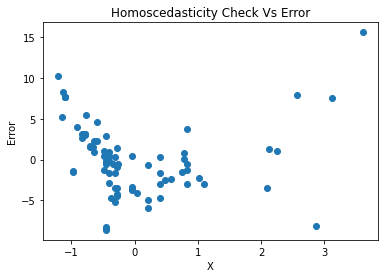

In [43]:
plt.scatter(x = scaled_X['HP'], y= error)
plt.title('Homoscedasticity Check Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

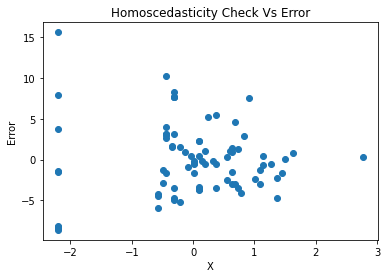

In [44]:
plt.scatter(x = scaled_X['VOL'], y= error)
plt.title('Homoscedasticity Check Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

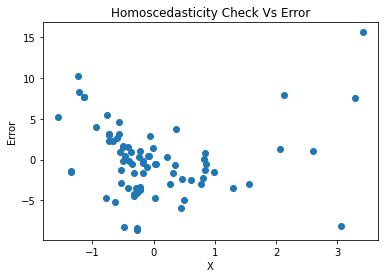

In [45]:
plt.scatter(x = scaled_X['SP'], y= error)
plt.title('Homoscedasticity Check Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

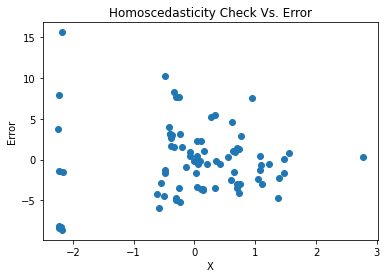

In [46]:
plt.scatter(x = scaled_X['WT'], y = error)
plt.title('Homoscedasticity Check Vs. Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### Observation:
Homoscedasticity test fails. 
The density of points above and below the lines is not similar (0 Line) and error range on y axis is also not satisfying.

### 7. Test for Zero Residual Mean:

In [47]:
y 

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


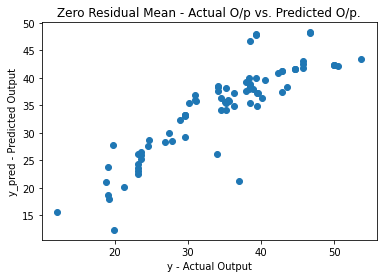

In [48]:
# Actual output vs. the predicted output:
plt.scatter(x= y, y = y_pred)
plt.title('Zero Residual Mean - Actual O/p vs. Predicted O/p.')
plt.xlabel('y - Actual Output')
plt.ylabel('y_pred - Predicted Output')
plt.show()

### Observation: 
Many points do not follow a straight line. Hence Zero residual mean test fails.